In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sympy.solvers import solve
from sympy import Symbol

#### Renaissance Technologies

I will try to use a Monte Carlo simulation to understand the dynamics of Renaissance Technologies (RenTech), one of the first quantitative hedge funds in the world, led by brilliant mathematicians, physicists and other academics, such as Jim Simons.

Their strategy is predicated on using computers to learn historical patterns. They don't really look at the so-called fundamanetals, but rather leverage advanced Machine Learning to model the dynamics of the stock market.

According to the podcast Acquired (https://www.acquired.fm/episodes/renaissance-technologies), they have a slight edge in their trades, meaning they profit on a little over 50% of them. They also shifted from doing a few trades to thousands of trades in any given period. I will try to simulate the effect of edge and trade amount on profits.

Assumptions:
- No shorting or leveraged trades; maximum loss is original investment amount
- The return on any given trade is distributed following a normal distribution with a mean close to, but slightly above, zero.
- Capital is always invested

C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


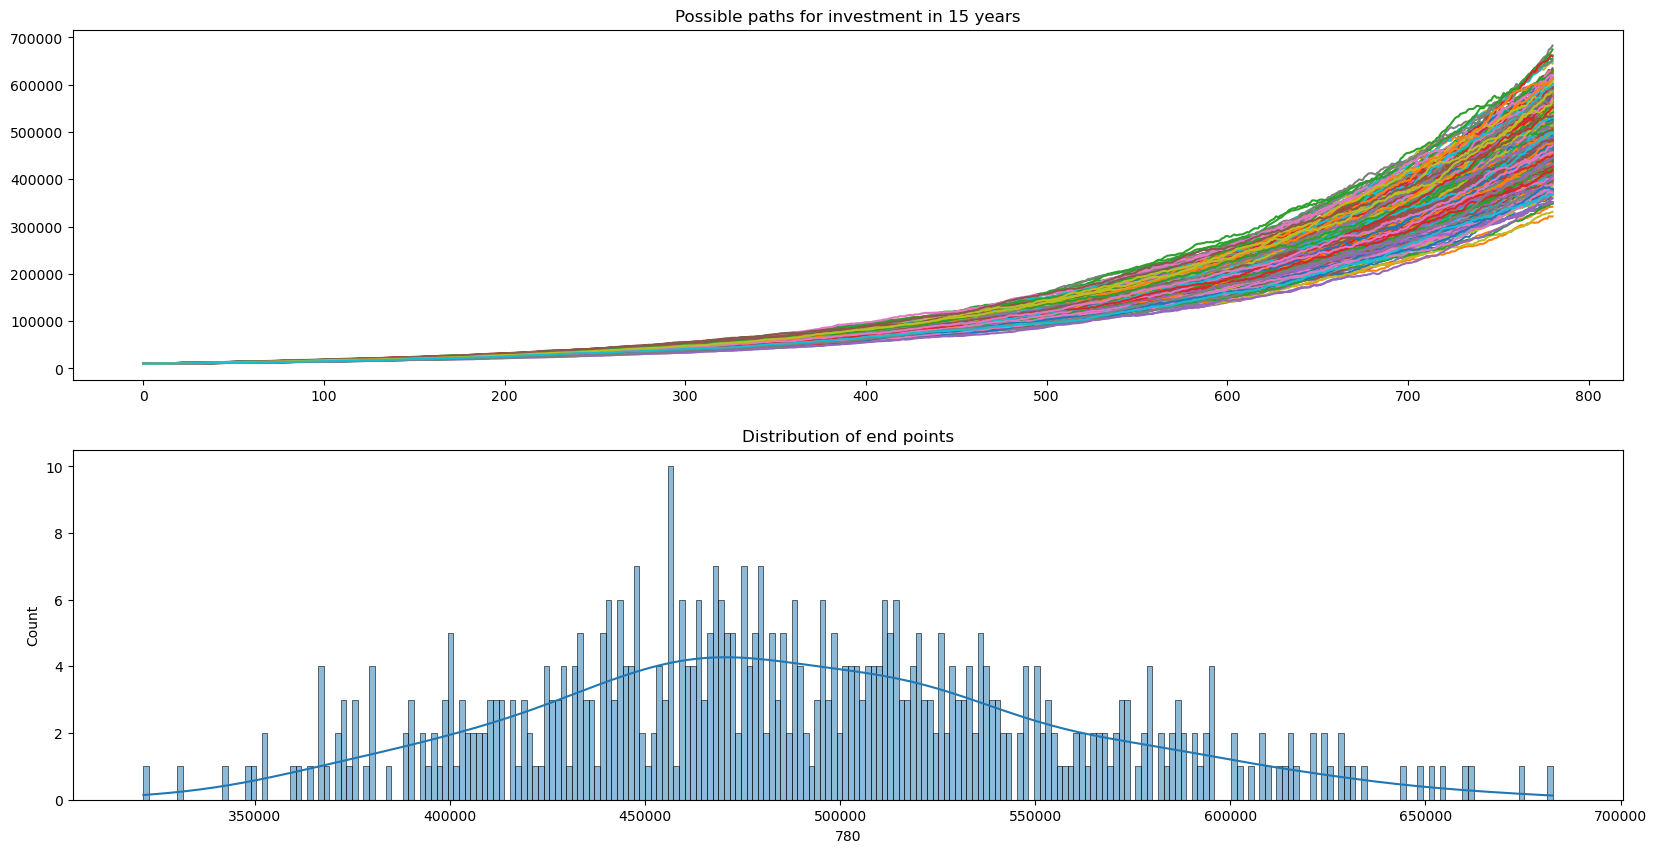

Median end point: 482488.0
Mean end point: 487910.8
Max end point: 682577
Min end point: 321457
Spread end point: 66941.0394970521
Max value: 682577
Min value: 9858
Daily % change: 0.4996061203118428%
Daily % volatility: 0.48513066448259673%
Mean total growth(%): 4779.108
Median yearly growth(%): 29.525520230491992
Mean yearly growth(%): 29.581158356171063


In [2]:
def std_calc(mean, upper_range):
    x = Symbol("x")
    result = solve(mean + 1.96 * x - upper_range)
    return result


std_calc(0.005, 0.1)
def RenTechSym(starting_capital = 10000, years = 15, n_trades = 100, n_periods = 52, sims = 5000, mean = 0.005, upper_ci = 0.1):
    rows = years * n_periods
    port_array = np.full(shape = (rows + 1, sims), fill_value= 0) # Creates array in which to store values
    port_array[0] = 10000

    std = std_calc(mean, upper_ci)[0]

    for m in range(sims):
        capital = starting_capital
        for period in range(rows):
            capital = capital
            amount_per_trade = capital / n_trades

            trade_returns = np.random.normal(mean, std, n_trades)
            trades = [amount_per_trade * (1 + i) for i in trade_returns]
            capital = np.sum(trades)
            port_array[period + 1, m] = capital
    port_df = pd.DataFrame(port_array)

    fig, ax = plt.subplots(2, 1, figsize = (20, 10))
    ax[0].plot(port_df)
    ax[0].set_title(f"Possible paths for investment in {years} years")
    sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])
    ax[1].set_title("Distribution of end points")
    plt.show()

    median_end_point = port_df.iloc[-1, :].median()
    mean_end_point = port_df.iloc[-1, :].mean()
    max_end_point = port_df.iloc[-1, :].max()
    min_end_point = port_df.iloc[-1, :].min()
    spread_end_point = port_df.iloc[-1, :].std()
    max_value = port_df.max().max()
    min_value = port_df.min().min()
    pct_change = (port_df.diff(1) / port_df.shift(1)) * 100
    daily_pct_change = pct_change.mean().mean()
    # gmean_pct_change = mean()
    daily_volatility = pct_change.std().mean()
    growth_total = ((port_df.iloc[-1, :] - starting_capital) / starting_capital) * 100


    print(f"Median end point: {median_end_point}")
    print(f"Mean end point: {mean_end_point}")
    print(f"Max end point: {max_end_point}")
    print(f"Min end point: {min_end_point}")
    print(f"Spread end point: {spread_end_point}")
    print(f"Max value: {max_value}")
    print(f"Min value: {min_value}")
    print(f"Daily % change: {daily_pct_change}%")
    print(f"Daily % volatility: {daily_volatility}%")
    print(f"Mean total growth(%): {growth_total.mean()}")

    growth_rates = []
    for i in np.arange(n_periods, (n_periods * years) + n_periods, n_periods):
        diffs = (port_df.diff(n_periods) / port_df.shift(n_periods)) * 100
        yearly_diffs = diffs.iloc[i, :]
        growth_rates.append([*yearly_diffs])

    median_year = np.median(np.array(growth_rates).flatten())
    mean_year = np.mean(np.array(growth_rates).flatten())
    print(f"Median yearly growth(%): {median_year}")
    print(f"Mean yearly growth(%): {mean_year}")

    stats = {"median_end" : median_end_point,
             "mean_end" : mean_end_point,
             "max_end" : max_end_point,
             "min_end" : min_end_point,
             "spread_end" : spread_end_point,
             "max_value" : max_value,
             "min_value" : min_value,
             "daily_pct_chng" : daily_pct_change,
             "daily_vol" : daily_volatility,
             "mean_tot_growth" : growth_total.mean(),
             "median_yearly_growth" : median_year,
             "mean_yearly_growth" : mean_year
             }
    
    
    return port_df, stats

df, stats = RenTechSym(sims = 500, n_trades=100)

#### Investigating the effect of number of trades on returns

Monte Carlo simulations of possible returns on profits.

Mean return on any given trade is 0.05%. Standard deviation is of 19/392 (so that the upper 95% percentile of returns is 10%).

Number of trades evaluated are: 1, 10, 50, 100, 250, 500, 1000, 5000.

C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


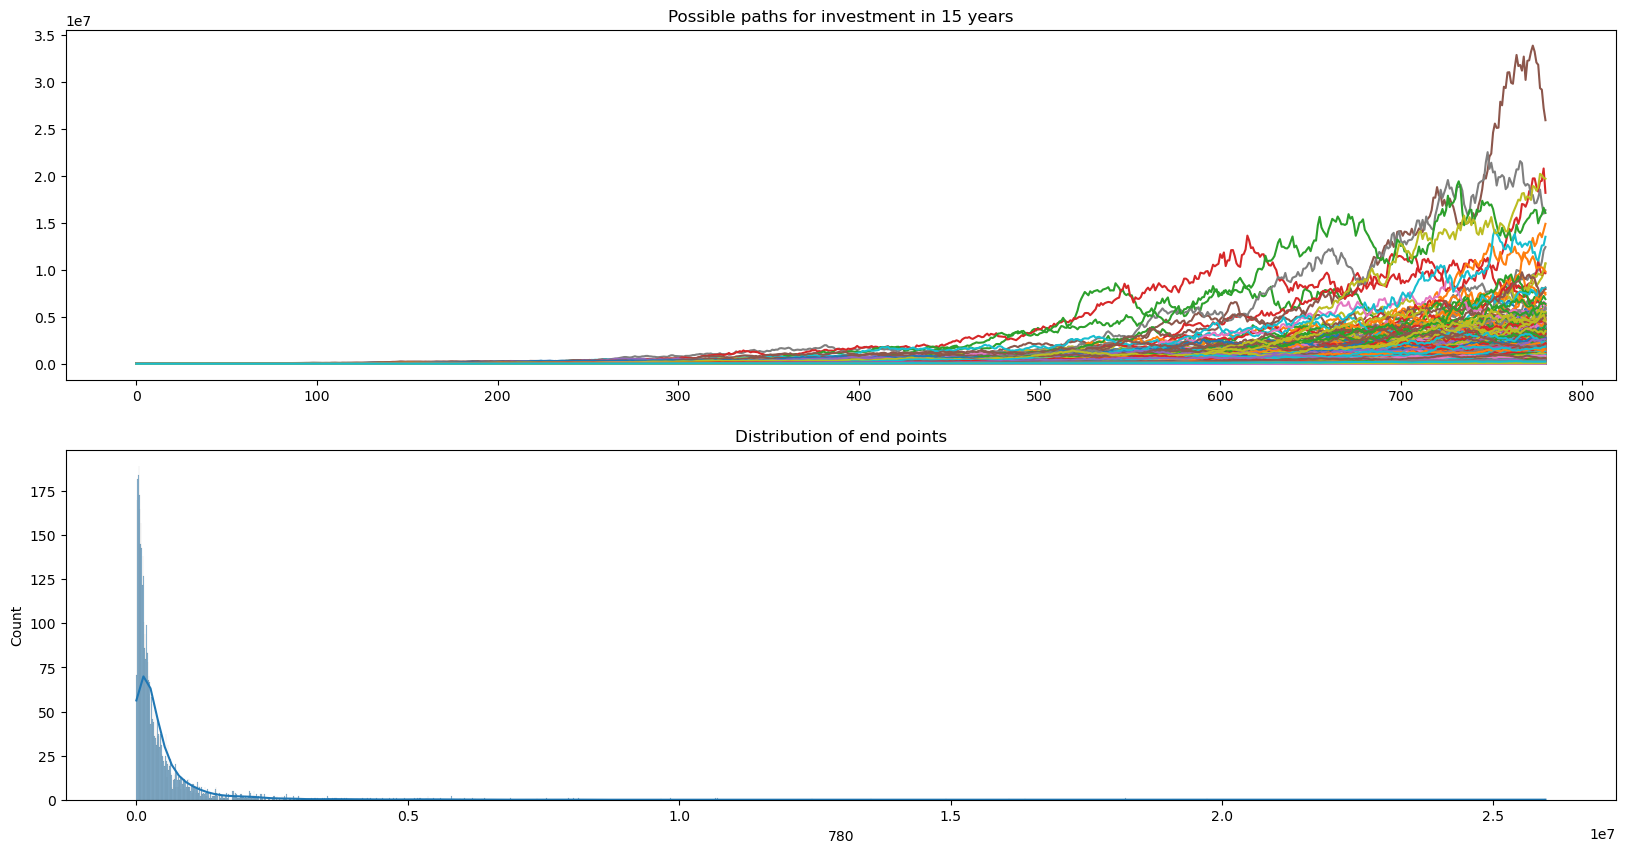

Median end point: 196786.0
Mean end point: 463421.6164
Max end point: 25961110
Min end point: 391
Spread end point: 1030931.91488707
Max value: 33907486
Min value: 193
Daily % change: 0.49840318642032233%
Daily % volatility: 4.846144082405483%
Mean total growth(%): 4534.216164
Median yearly growth(%): 21.85861423143312
Mean yearly growth(%): 29.51853920340361


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


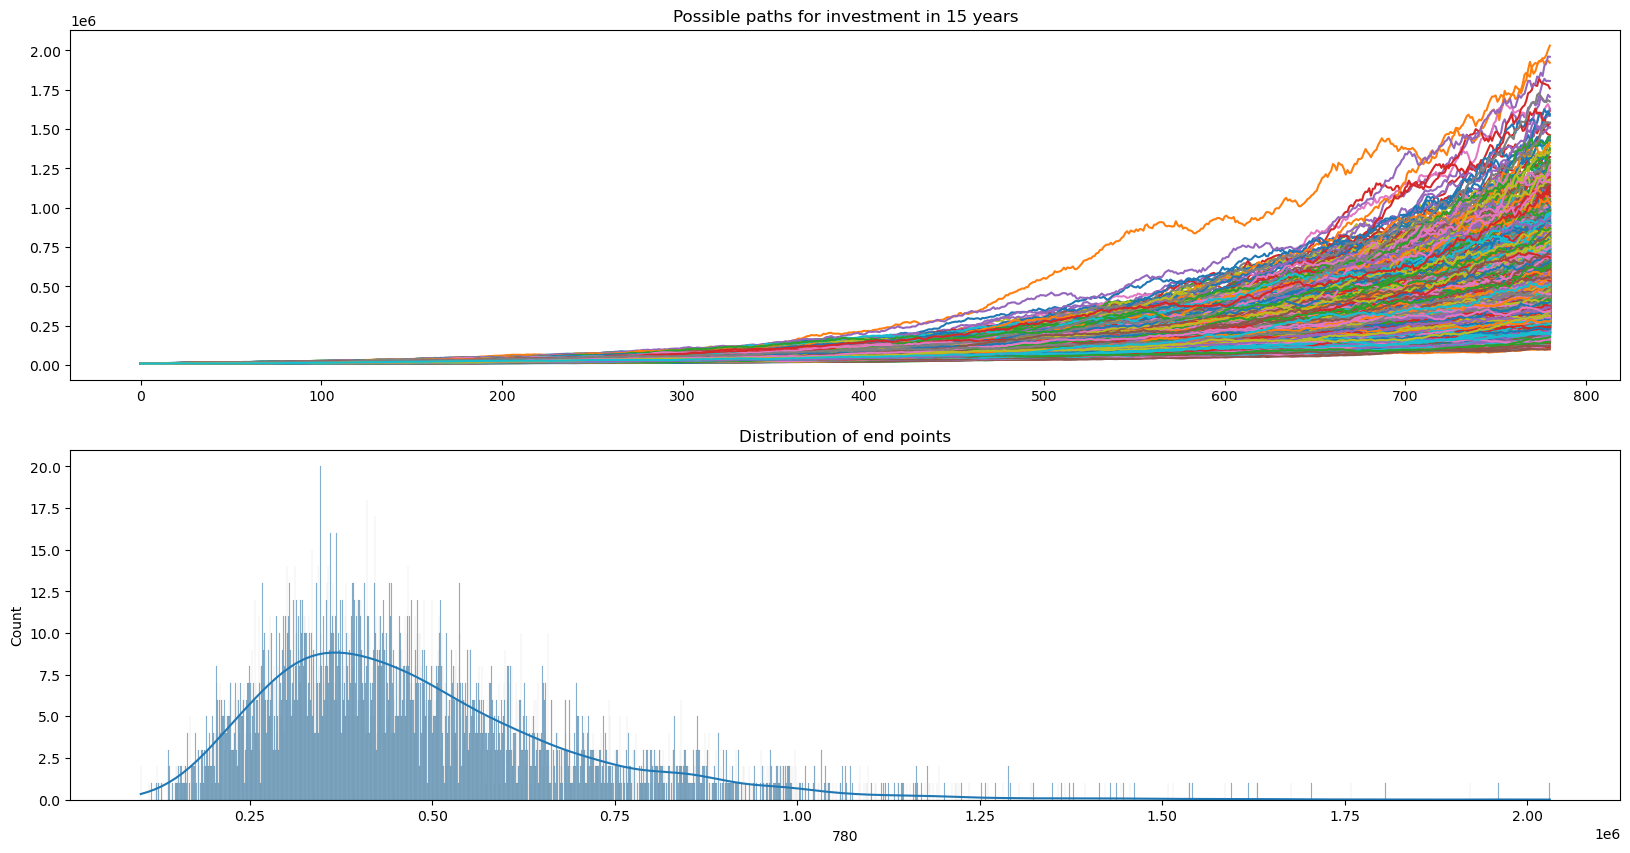

Median end point: 438880.5
Mean end point: 484921.1252
Max end point: 2030731
Min end point: 100876
Spread end point: 220833.16606993676
Max value: 2030731
Min value: 8417
Daily % change: 0.49859552855660466%
Daily % volatility: 1.5320985330703247%
Mean total growth(%): 4749.211251999999
Median yearly growth(%): 28.75097138792837
Mean yearly growth(%): 29.509266766560426


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


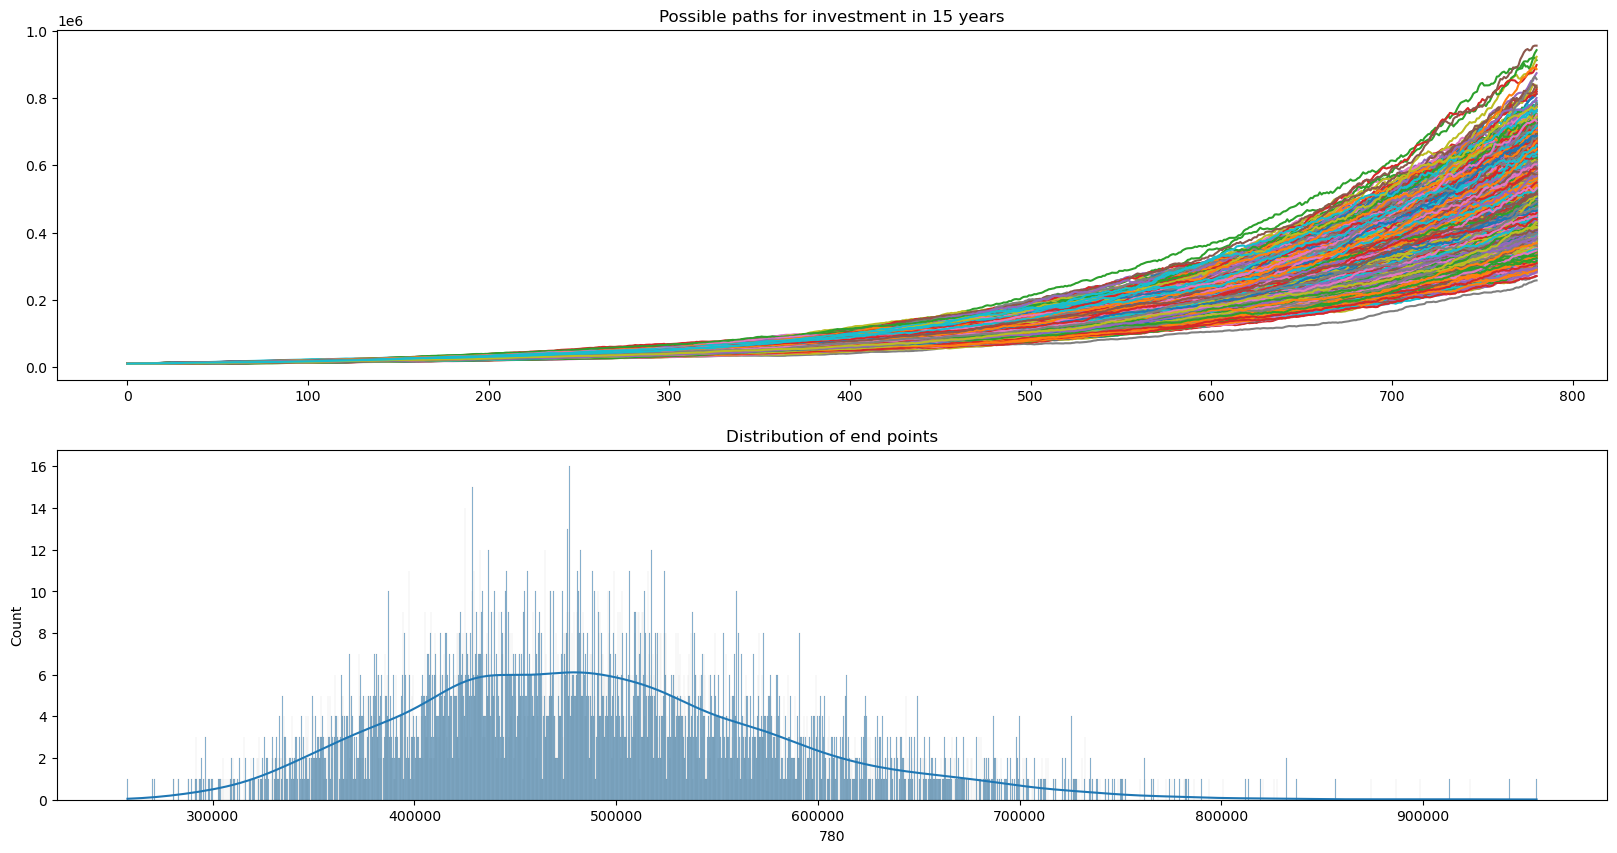

Median end point: 480772.0
Mean end point: 489176.742
Max end point: 956197
Min end point: 257739
Spread end point: 93499.30296000406
Max value: 956249
Min value: 9581
Daily % change: 0.5000211633143365%
Daily % volatility: 0.6852923161066635%
Mean total growth(%): 4791.76742
Median yearly growth(%): 29.42711448571539
Mean yearly growth(%): 29.611161616844342


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


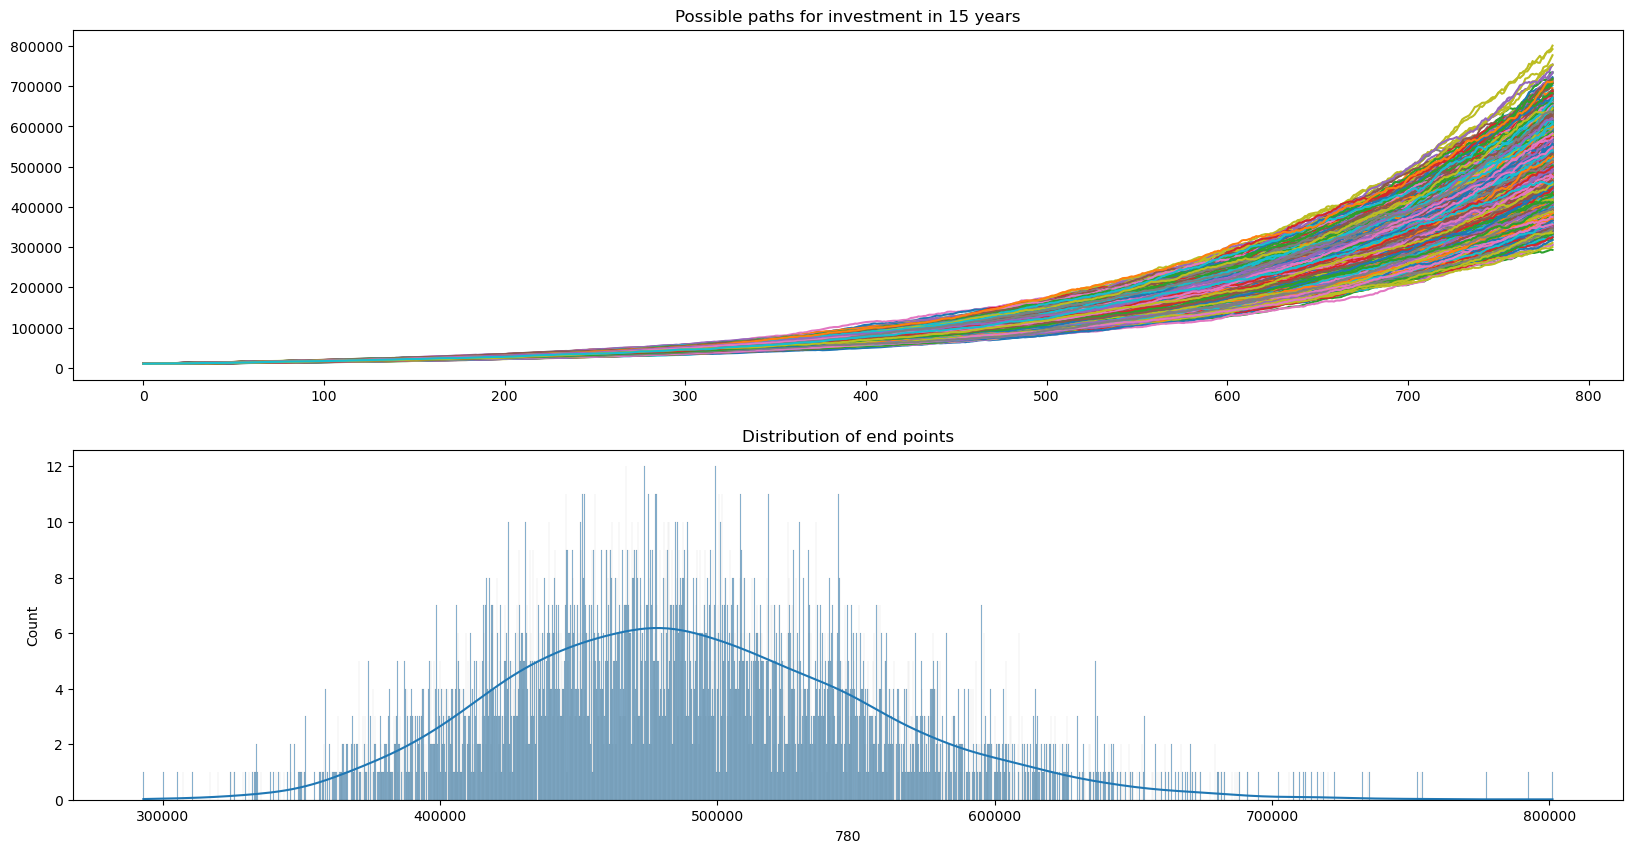

Median end point: 485534.0
Mean end point: 490558.0304
Max end point: 801090
Min end point: 293098
Spread end point: 66744.30040546677
Max value: 801090
Min value: 9802
Daily % change: 0.5003339635351988%
Daily % volatility: 0.4842380704573893%
Mean total growth(%): 4805.580304
Median yearly growth(%): 29.559009398484896
Mean yearly growth(%): 29.631580737951833


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


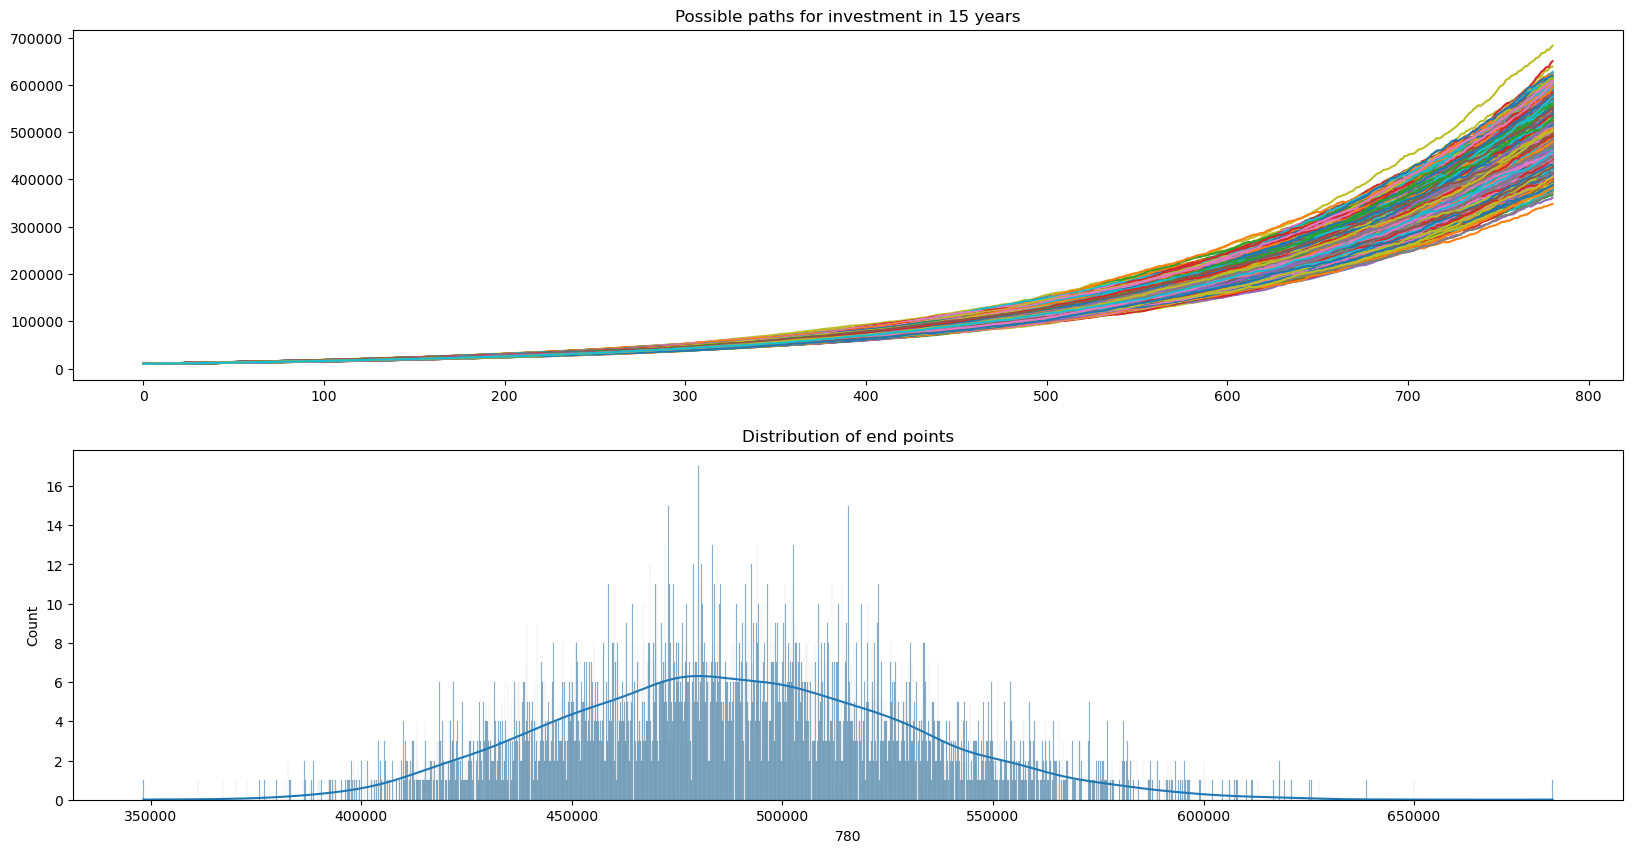

Median end point: 487338.5
Mean end point: 489043.0326
Max end point: 682866
Min end point: 348234
Spread end point: 41997.98716349978
Max value: 682866
Min value: 9933
Daily % change: 0.49993933109971506%
Daily % volatility: 0.3063567414495561%
Mean total growth(%): 4790.430326000001
Median yearly growth(%): 29.595723560789825
Mean yearly growth(%): 29.604829243010624


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


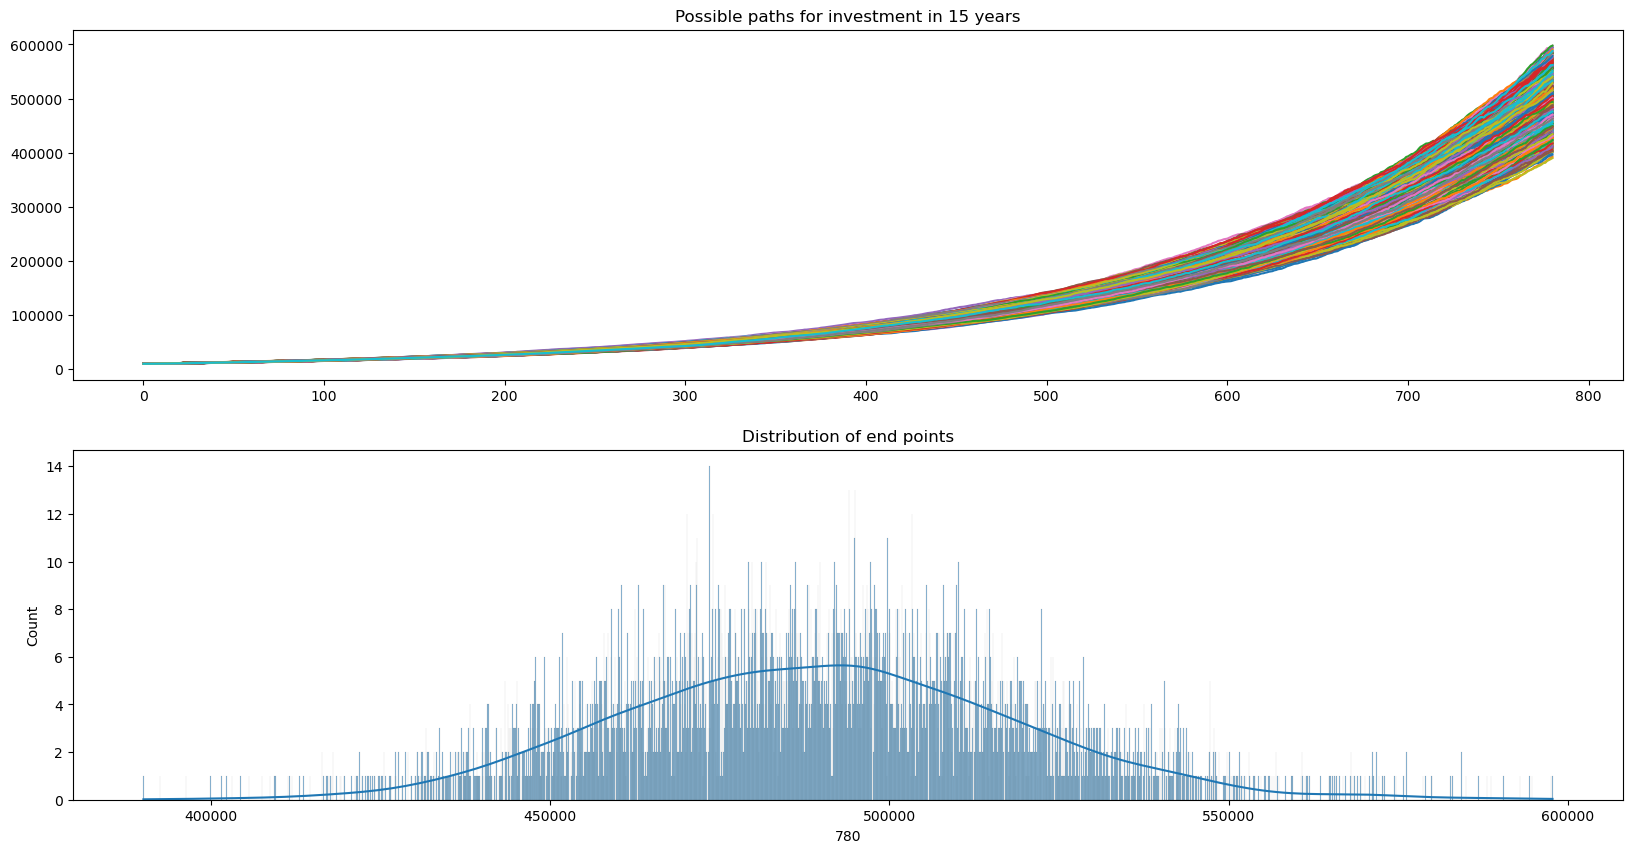

Median end point: 489150.5
Mean end point: 489458.441
Max end point: 597759
Min end point: 390040
Spread end point: 29090.601876482844
Max value: 597759
Min value: 9978
Daily % change: 0.5000621827982492%
Daily % volatility: 0.2167106346508466%
Mean total growth(%): 4794.58441
Median yearly growth(%): 29.59202910170997
Mean yearly growth(%): 29.61304272299335


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


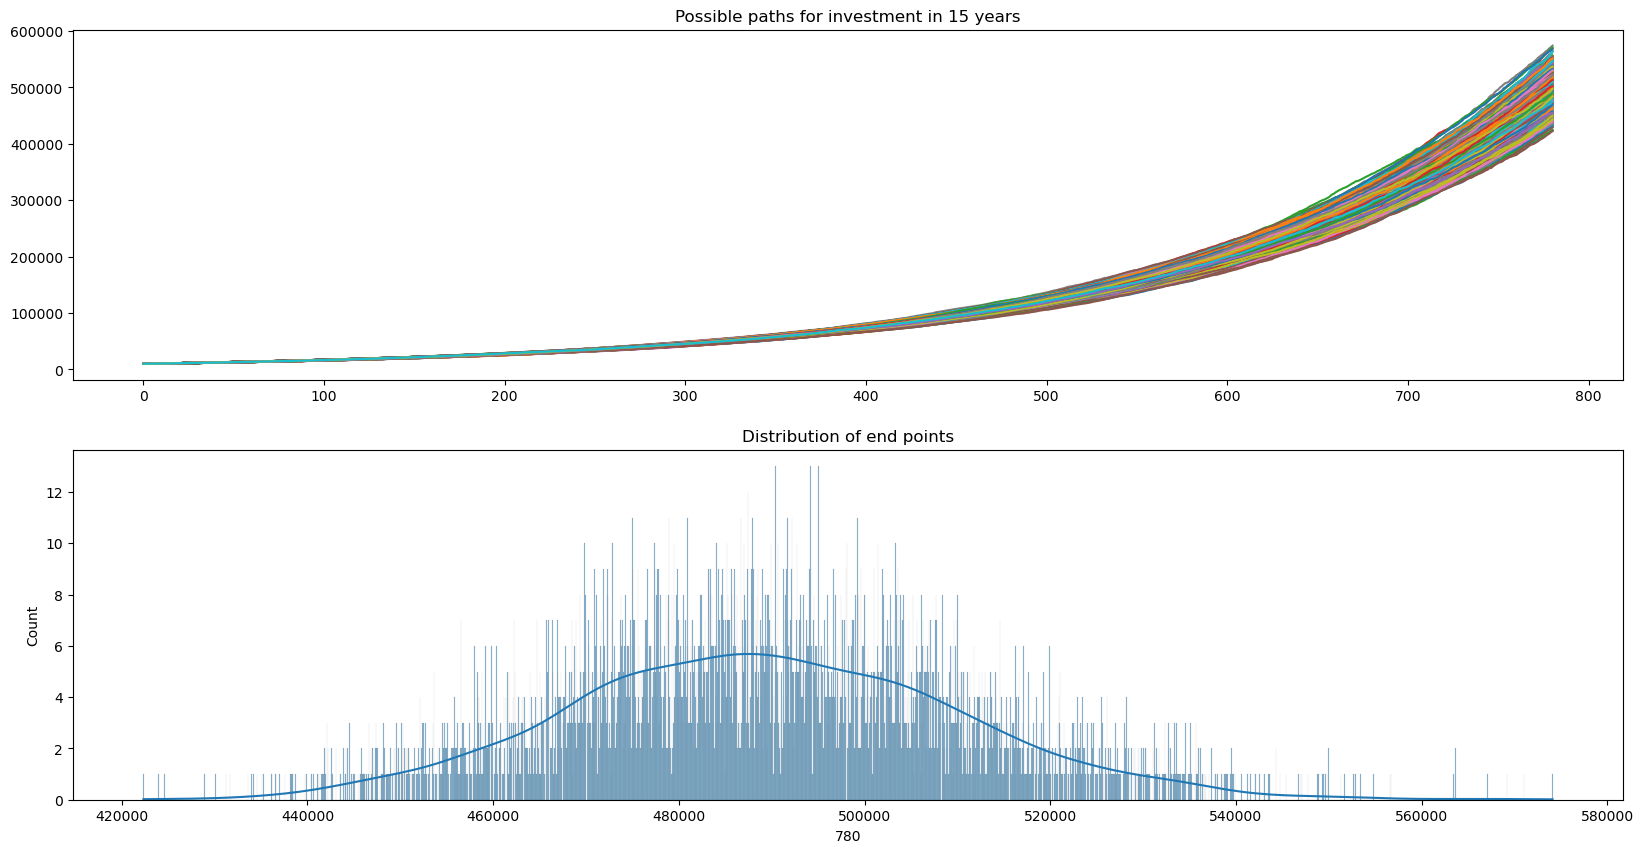

Median end point: 488651.5
Mean end point: 489277.0642
Max end point: 574084
Min end point: 422333
Spread end point: 20890.040738784865
Max value: 574084
Min value: 9996
Daily % change: 0.5000074779578463%
Daily % volatility: 0.15315118054127758%
Mean total growth(%): 4792.770642
Median yearly growth(%): 29.598912138885073
Mean yearly growth(%): 29.60952648554141


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


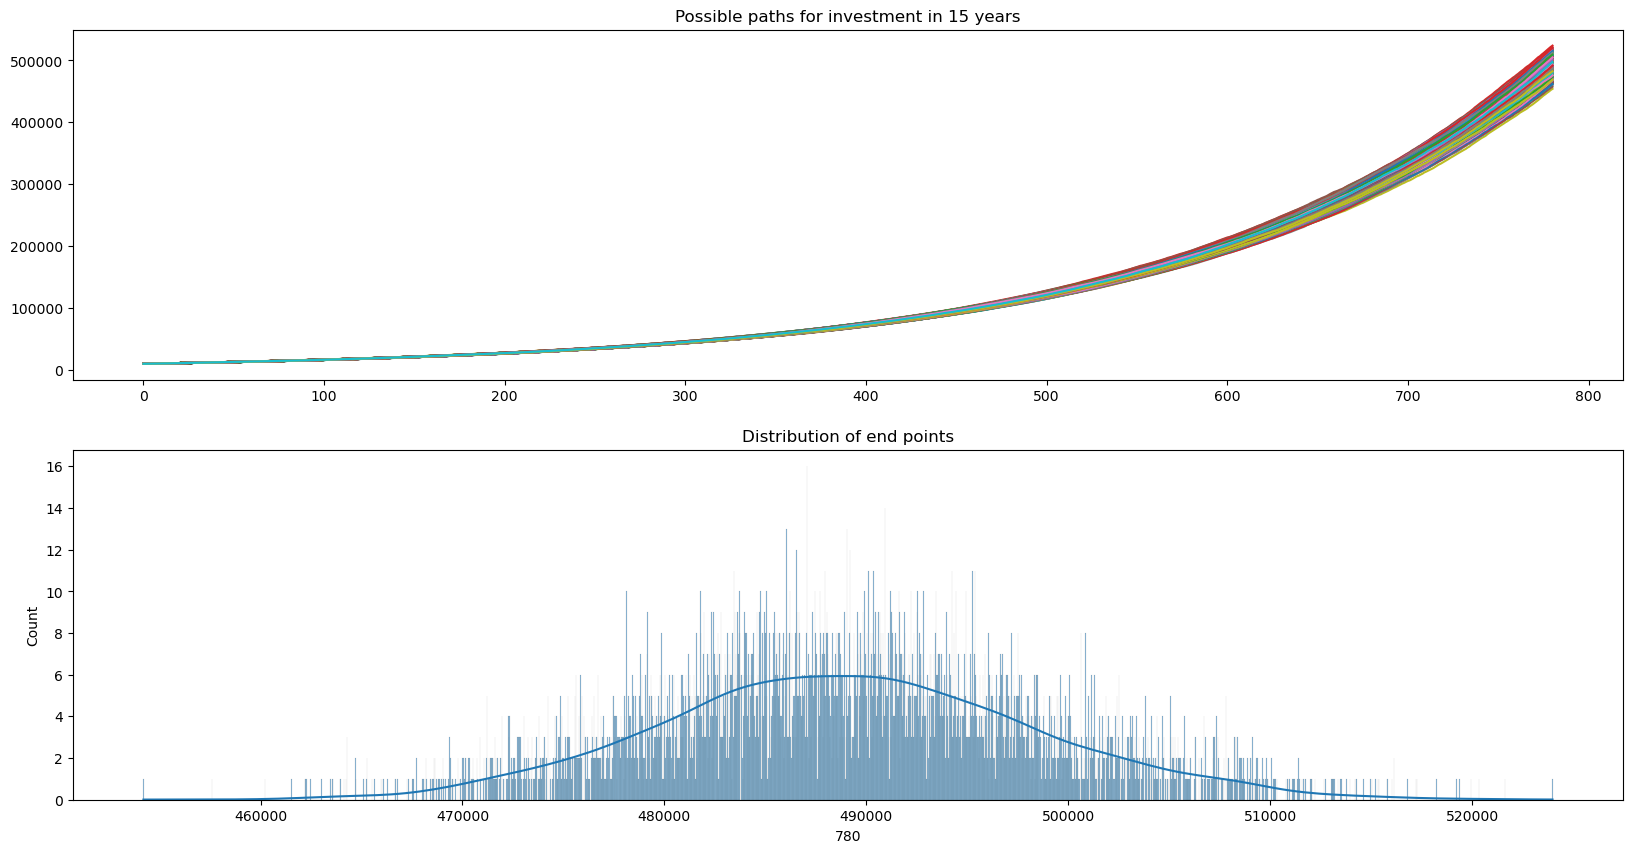

Median end point: 488917.5
Mean end point: 489117.6006
Max end point: 523980
Min end point: 454201
Spread end point: 9282.717024996122
Max value: 523980
Min value: 10000
Daily % change: 0.49996613378720206%
Daily % volatility: 0.06855724216133295%
Mean total growth(%): 4791.176006
Median yearly growth(%): 29.605384202193836
Mean yearly growth(%): 29.606747418985417


[{'median_end': 196786.0,
  'mean_end': 463421.6164,
  'max_end': 25961110,
  'min_end': 391,
  'spread_end': 1030931.91488707,
  'max_value': 33907486,
  'min_value': 193,
  'daily_pct_chng': 0.49840318642032233,
  'daily_vol': 4.846144082405483,
  'mean_tot_growth': 4534.216164,
  'median_yearly_growth': 21.85861423143312,
  'mean_yearly_growth': 29.51853920340361},
 {'median_end': 438880.5,
  'mean_end': 484921.1252,
  'max_end': 2030731,
  'min_end': 100876,
  'spread_end': 220833.16606993676,
  'max_value': 2030731,
  'min_value': 8417,
  'daily_pct_chng': 0.49859552855660466,
  'daily_vol': 1.5320985330703247,
  'mean_tot_growth': 4749.211251999999,
  'median_yearly_growth': 28.75097138792837,
  'mean_yearly_growth': 29.509266766560426},
 {'median_end': 480772.0,
  'mean_end': 489176.742,
  'max_end': 956197,
  'min_end': 257739,
  'spread_end': 93499.30296000406,
  'max_value': 956249,
  'min_value': 9581,
  'daily_pct_chng': 0.5000211633143365,
  'daily_vol': 0.6852923161066635

In [5]:
n_trades_range = [1, 10, 50, 100, 250, 500, 1000, 5000]

stats_list = []
end_points_list = []
for i in n_trades_range:
    df, stats = RenTechSym(sims = 1000, n_trades = i)
    stats_list.append(stats)
    end_points_list.append(df.iloc[-1, :])
stats_list 

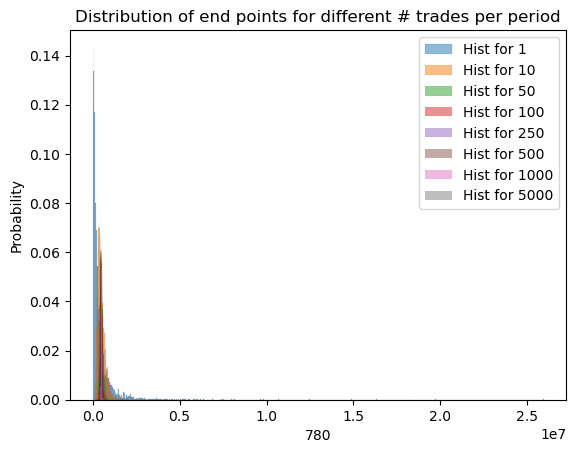

In [6]:
for end_points in range(len(end_points_list)):
    sns.histplot(end_points_list[end_points], label = f"Hist for {n_trades_range[end_points]}", alpha = 0.5, stat = "probability")

plt.title("Distribution of end points for different # trades per period")
plt.legend()
plt.show()

In [7]:
stats_df = pd.DataFrame(stats_list, index=[i for i in n_trades_range])

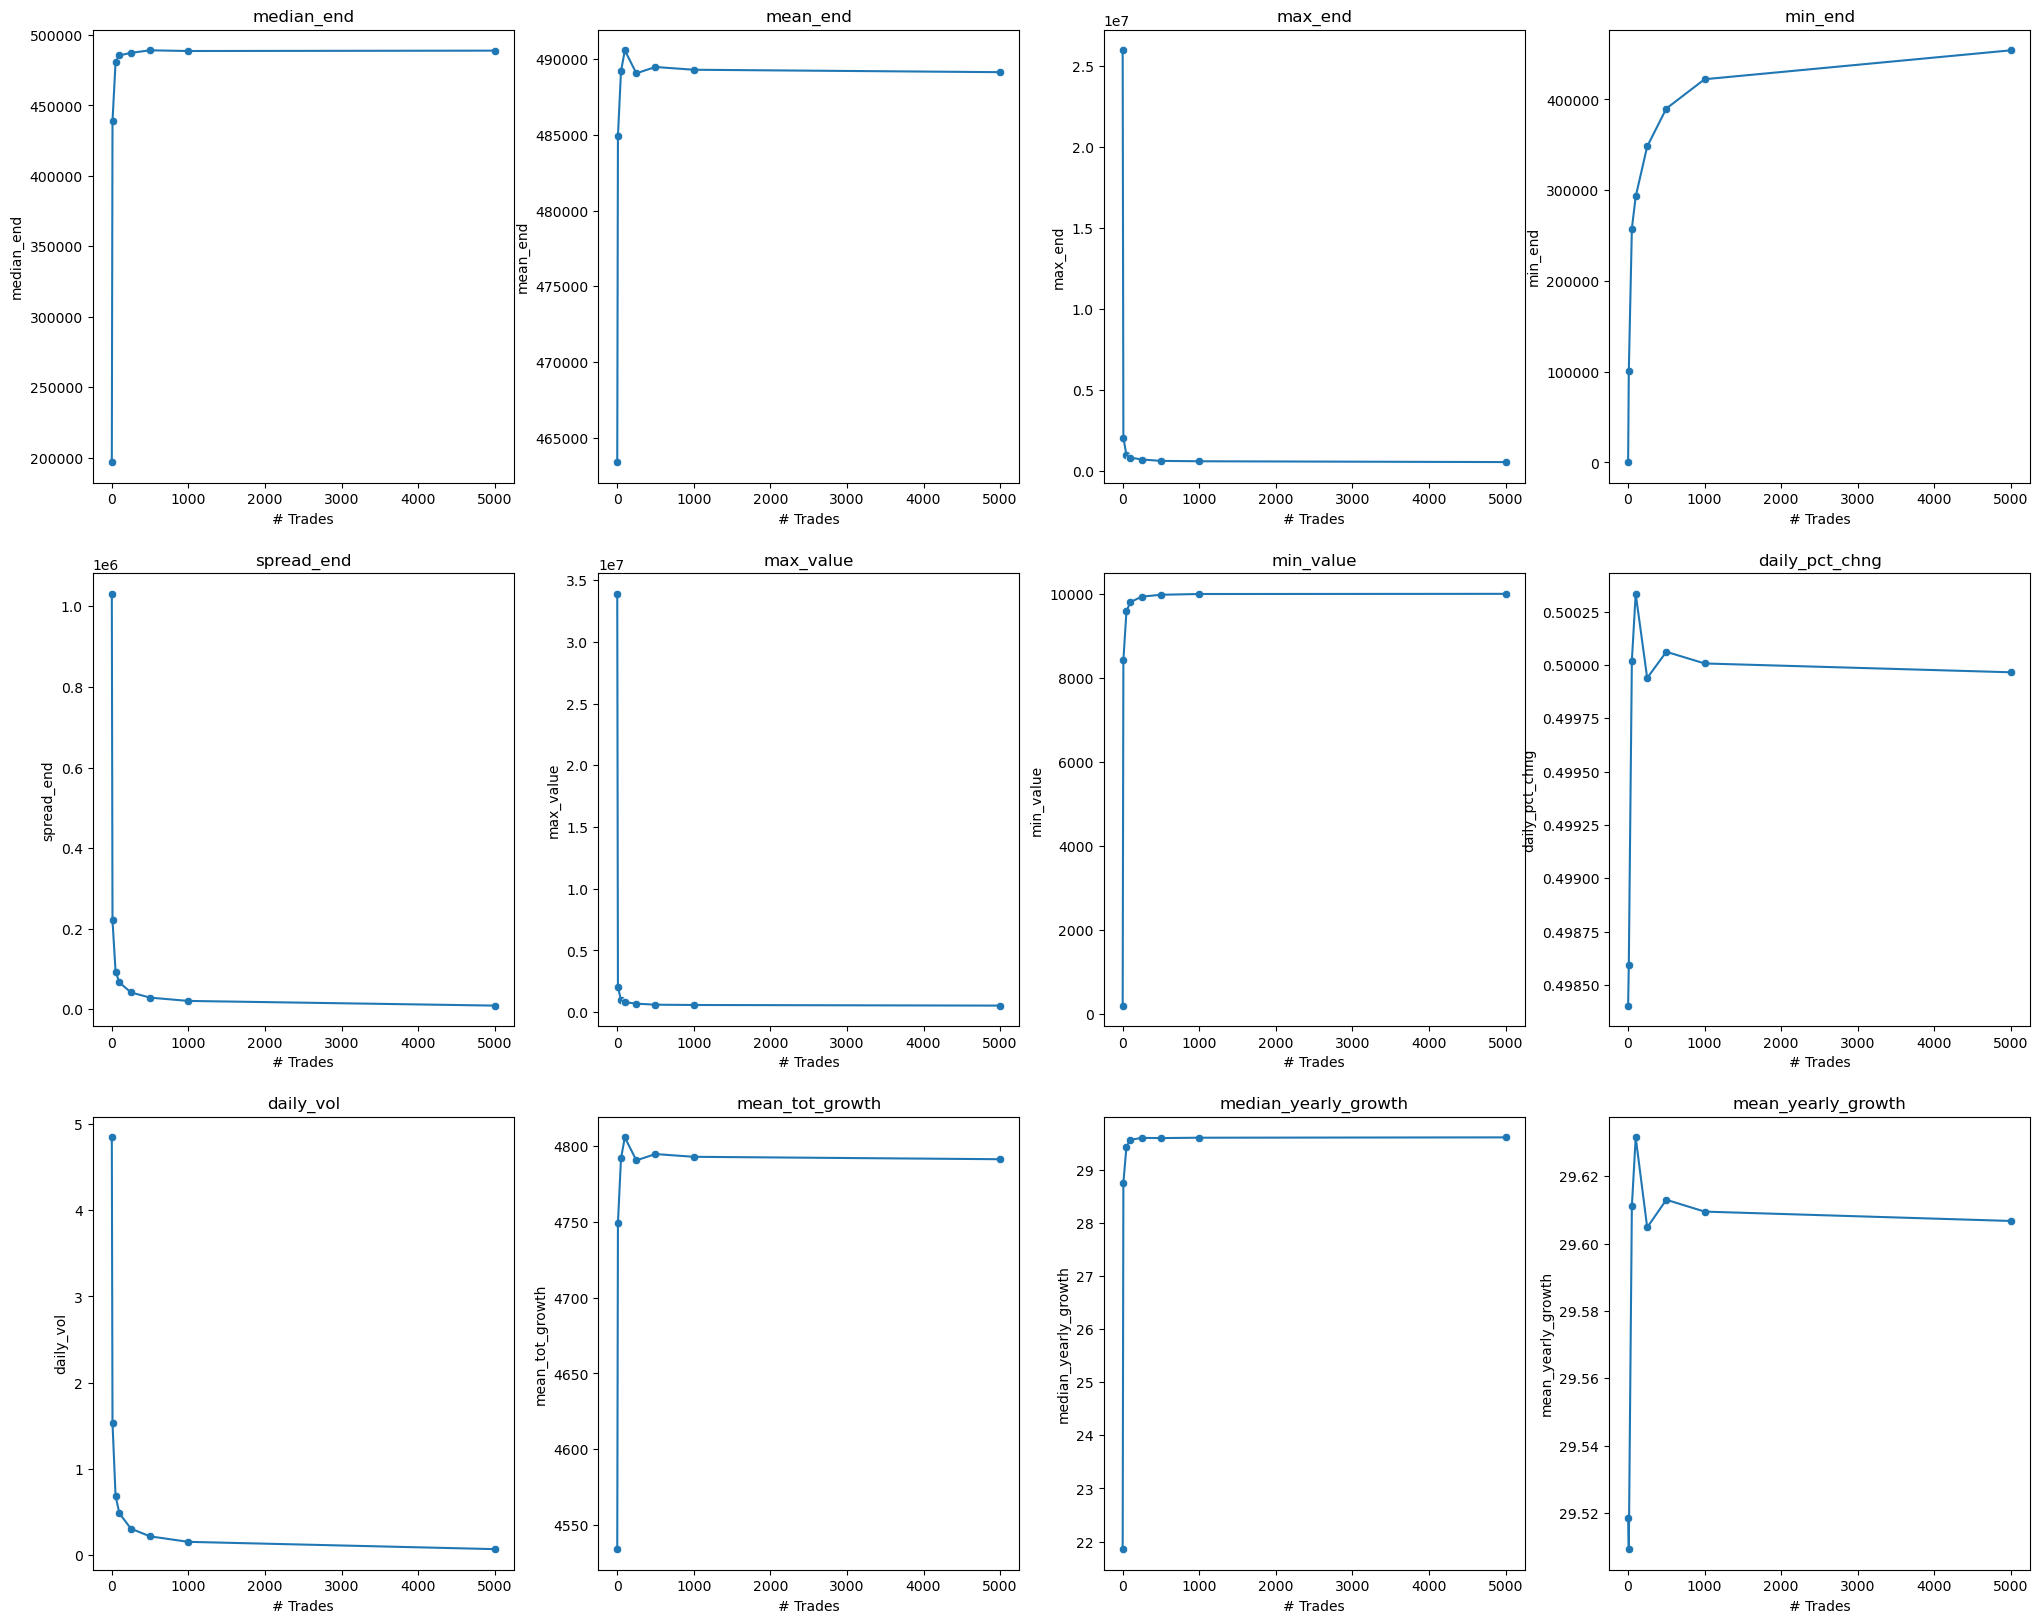

In [8]:
fig, axes = plt.subplots(3, 4, figsize = (25, 20))

ax = axes.flatten()

for i in range(len(ax)):
    sns.lineplot(data = stats_df, x = stats_df.index, y = stats_df.iloc[:, i], ax = ax[i])
    sns.scatterplot(data = stats_df, x = stats_df.index, y = stats_df.iloc[:, i], ax = ax[i])
    ax[i].set_title(stats_df.columns[i])
    ax[i].set_xlabel("# Trades")

plt.show()

C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


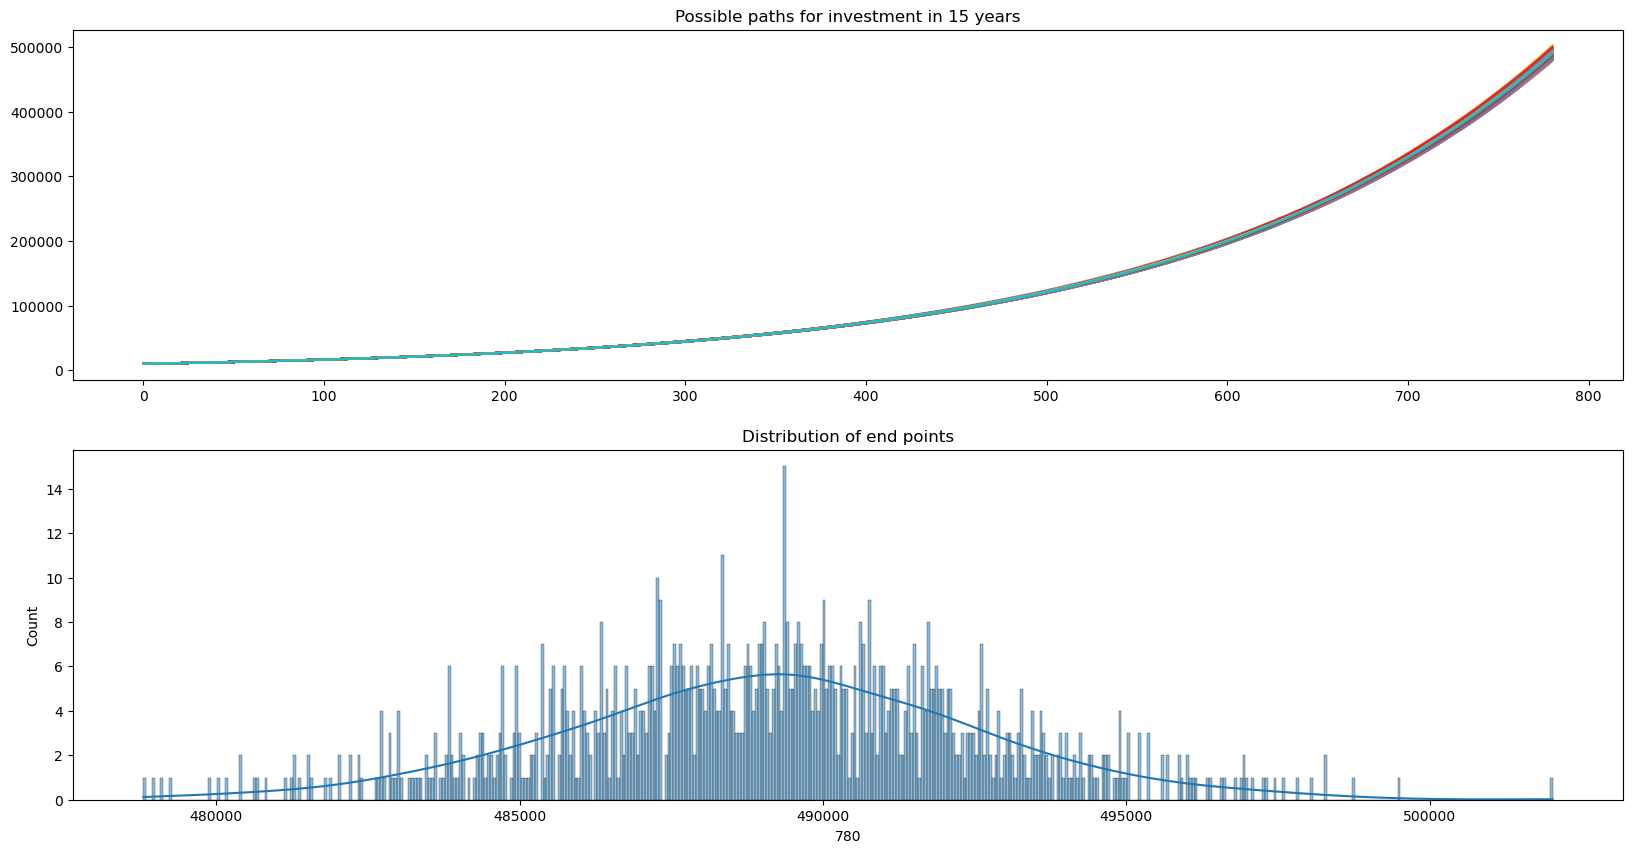

Median end point: 489207.5
Mean end point: 489108.954
Max end point: 502026
Min end point: 478800
Spread end point: 3427.006658663286
Max value: 502026
Min value: 10000
Daily % change: 0.49996373337385575%
Daily % volatility: 0.02556465927449078%
Mean total growth(%): 4791.08954
Median yearly growth(%): 29.60675805996039
Mean yearly growth(%): 29.606584774859506


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


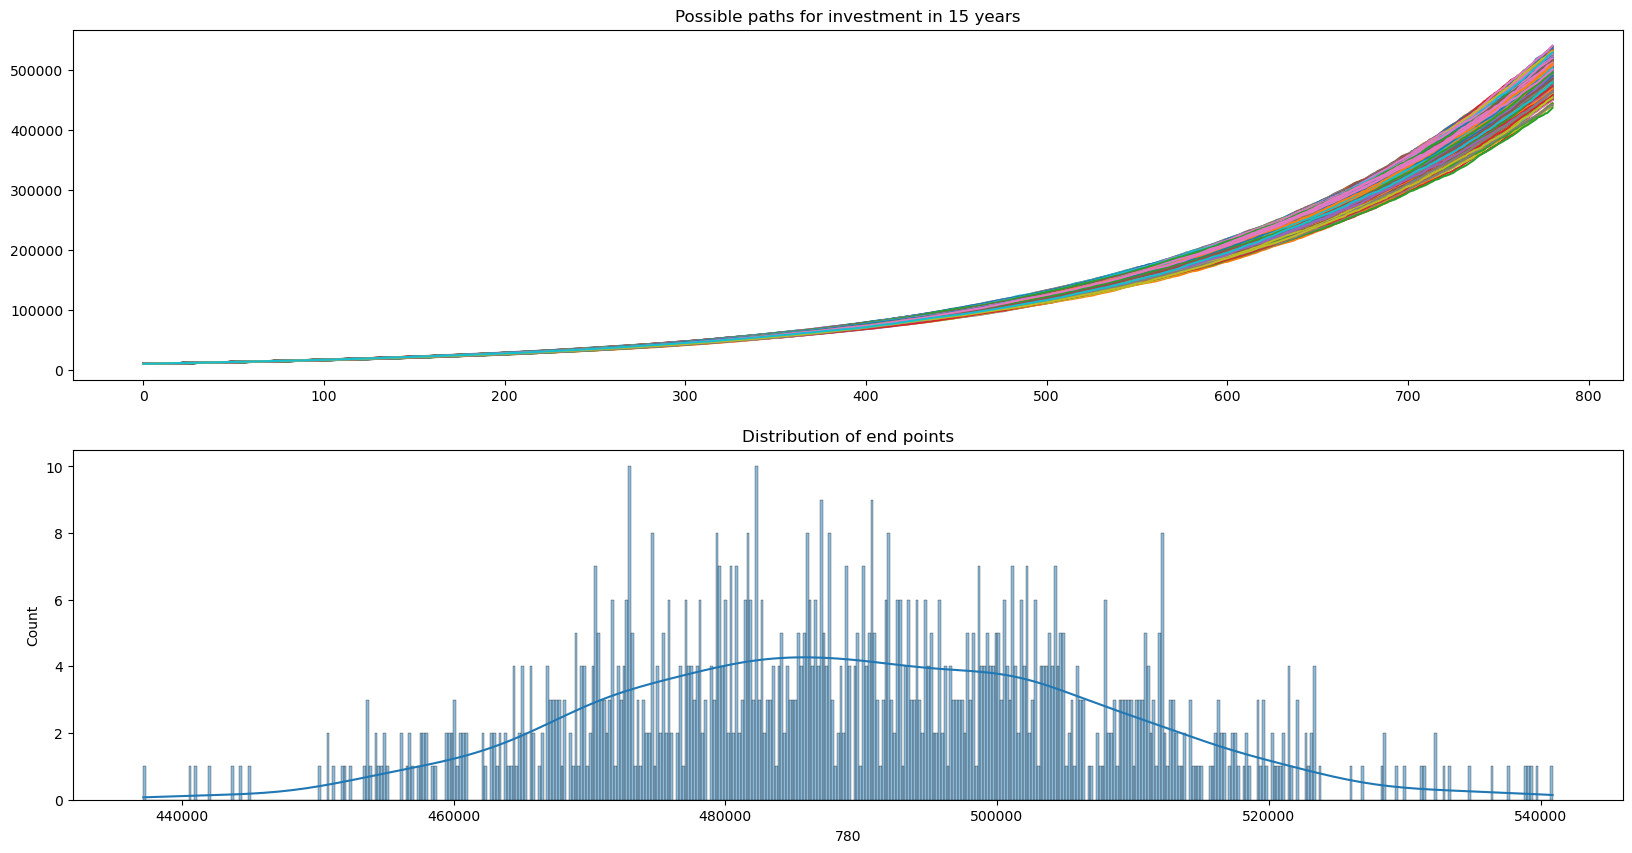

Median end point: 489000.0
Mean end point: 489527.457
Max end point: 540884
Min end point: 437170
Spread end point: 17856.627280031596
Max value: 540884
Min value: 10000
Daily % change: 0.5000689658018603%
Daily % volatility: 0.1273586939958809%
Mean total growth(%): 4795.2745700000005
Median yearly growth(%): 29.618797358074204
Mean yearly growth(%): 29.613650704136486


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


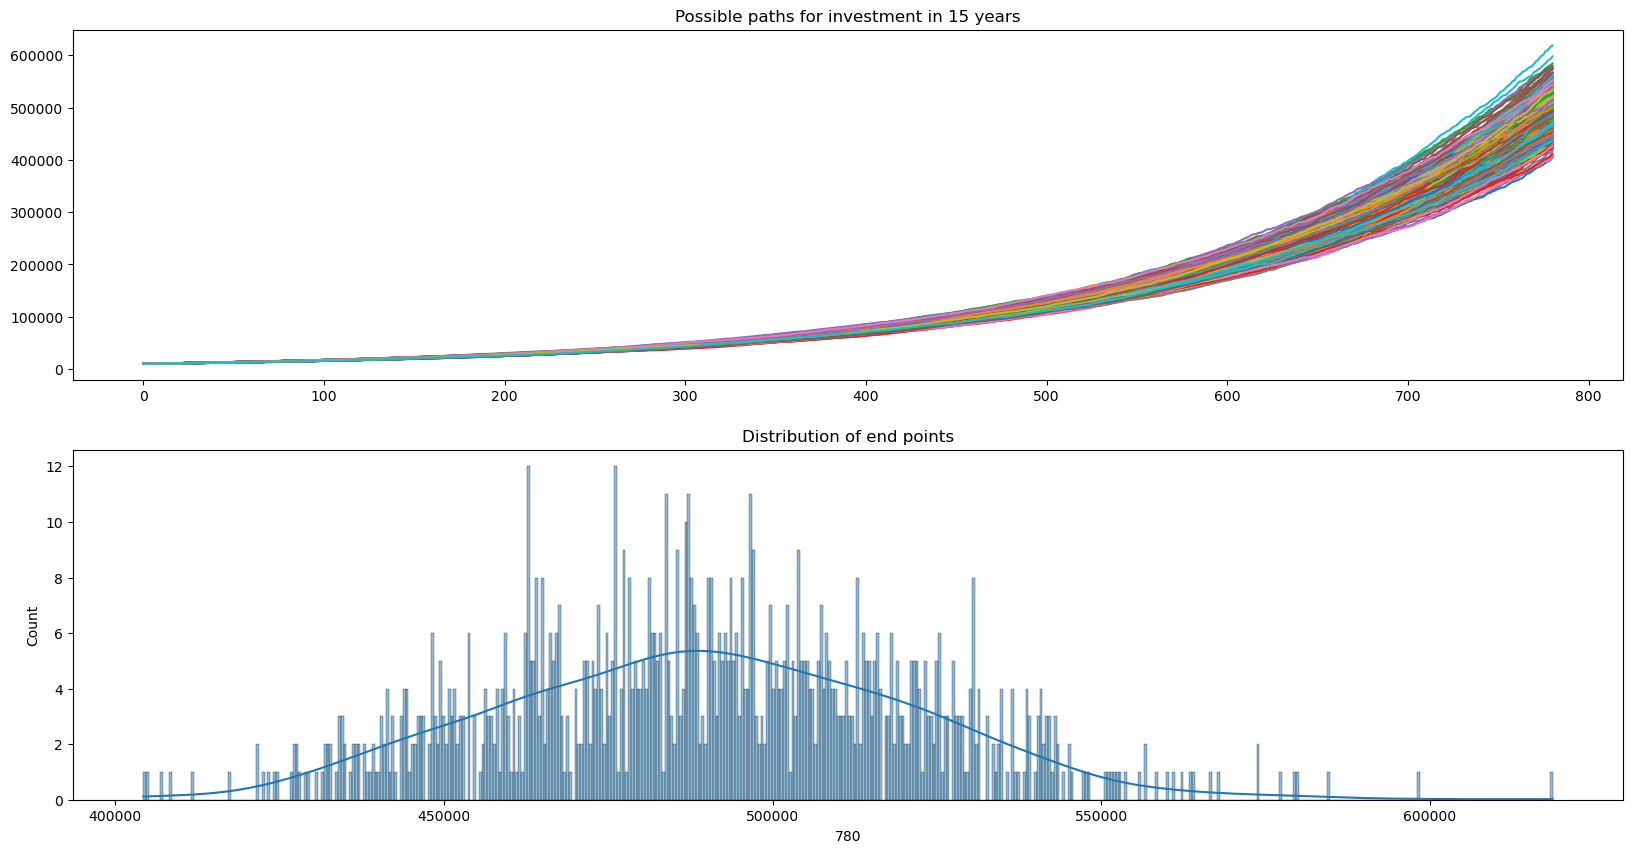

Median end point: 489042.5
Mean end point: 489776.376
Max end point: 618635
Min end point: 404285
Spread end point: 31218.37128885093
Max value: 618635
Min value: 9960
Daily % change: 0.500140486141868%
Daily % volatility: 0.2296324018801518%
Mean total growth(%): 4797.76376
Median yearly growth(%): 29.608801924721227
Mean yearly growth(%): 29.618615659185814


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


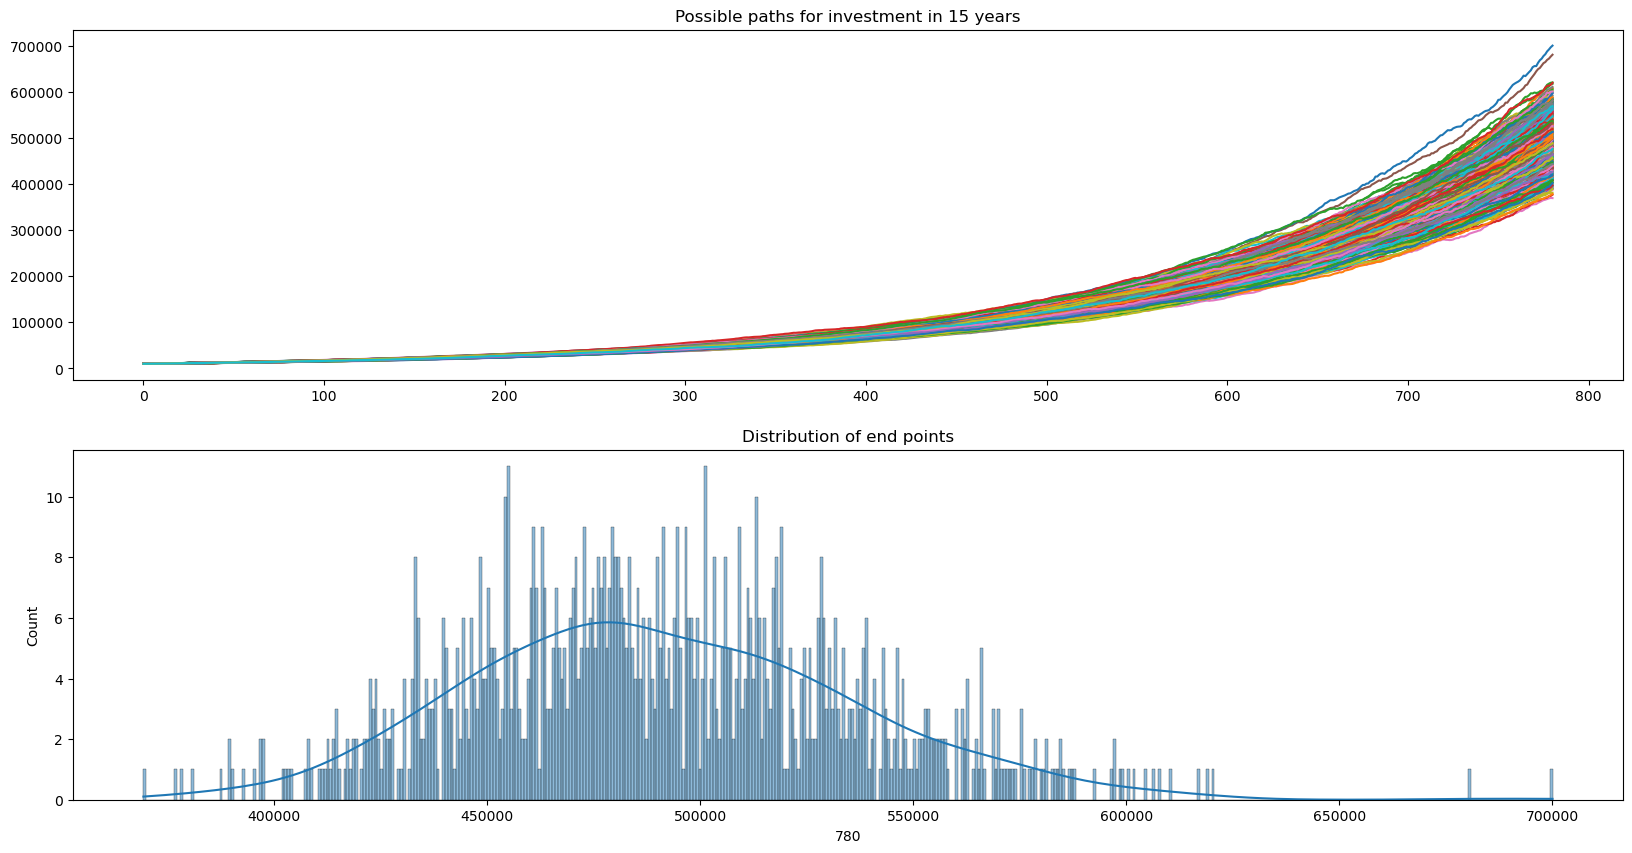

Median end point: 486998.0
Mean end point: 490703.733
Max end point: 700027
Min end point: 369331
Spread end point: 44702.41305951007
Max value: 700027
Min value: 9943
Daily % change: 0.5004025939780679%
Daily % volatility: 0.3319981515515496%
Mean total growth(%): 4807.03733
Median yearly growth(%): 29.58774172284079
Mean yearly growth(%): 29.63606268769551


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


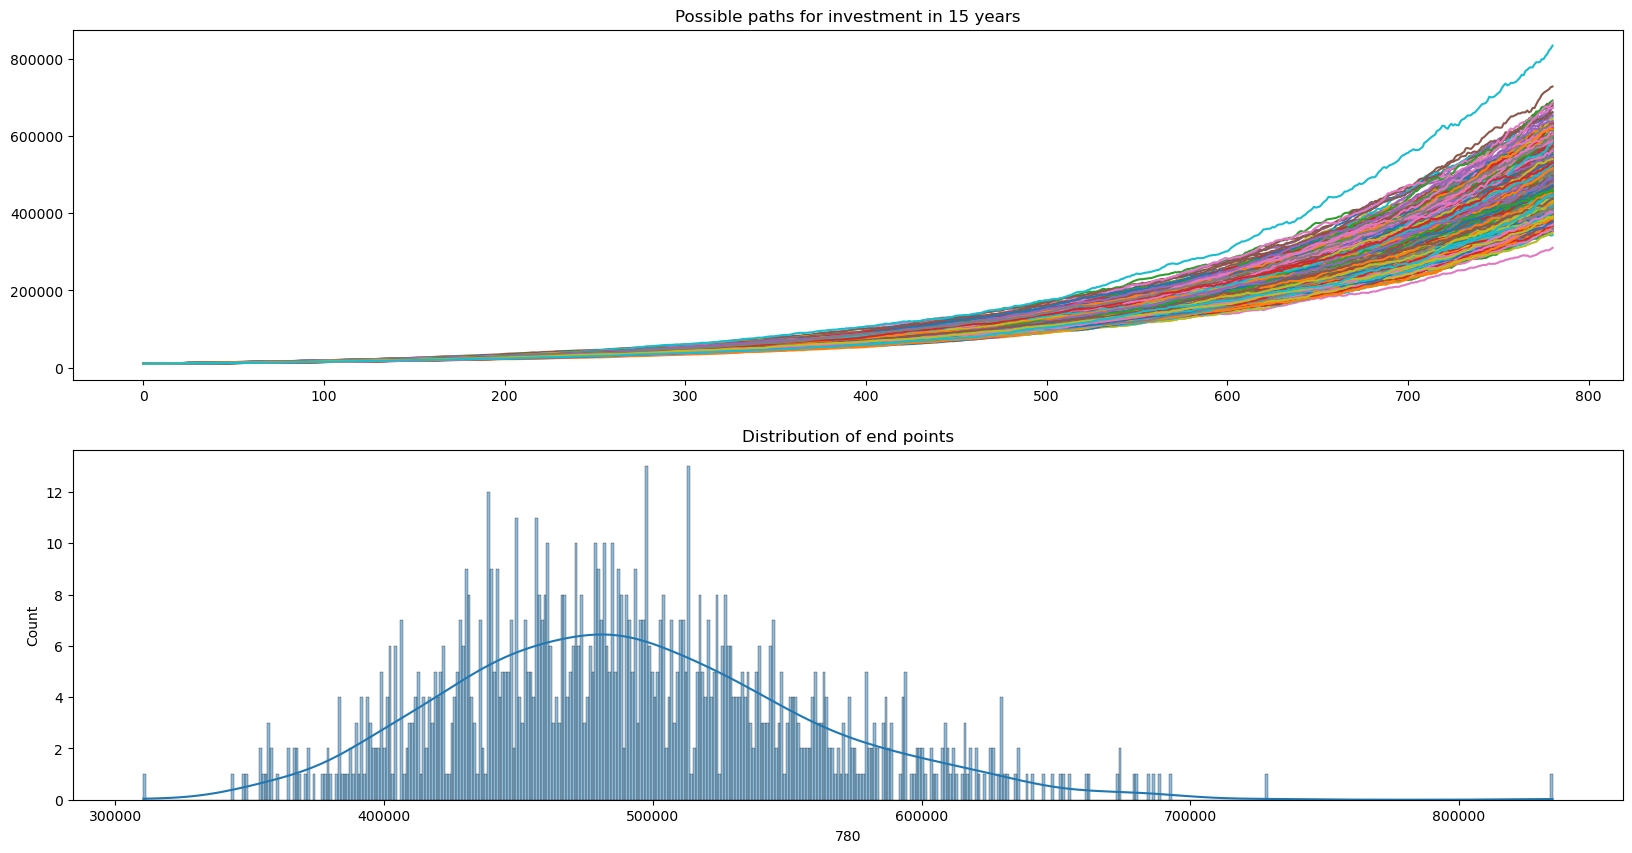

Median end point: 485699.0
Mean end point: 491069.992
Max end point: 834745
Min end point: 310528
Spread end point: 66153.15827084253
Max value: 834745
Min value: 9831
Daily % change: 0.500500426437363%
Daily % volatility: 0.4844761257312082%
Mean total growth(%): 4810.69992
Median yearly growth(%): 29.580146432244476
Mean yearly growth(%): 29.64100508683807


C:\Users\jotin\AppData\Local\Temp\ipykernel_52436\1102305973.py:30: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(port_df.iloc[-1, :], bins = sims // 2, palette = "viridis", kde = True, ax = ax[1])


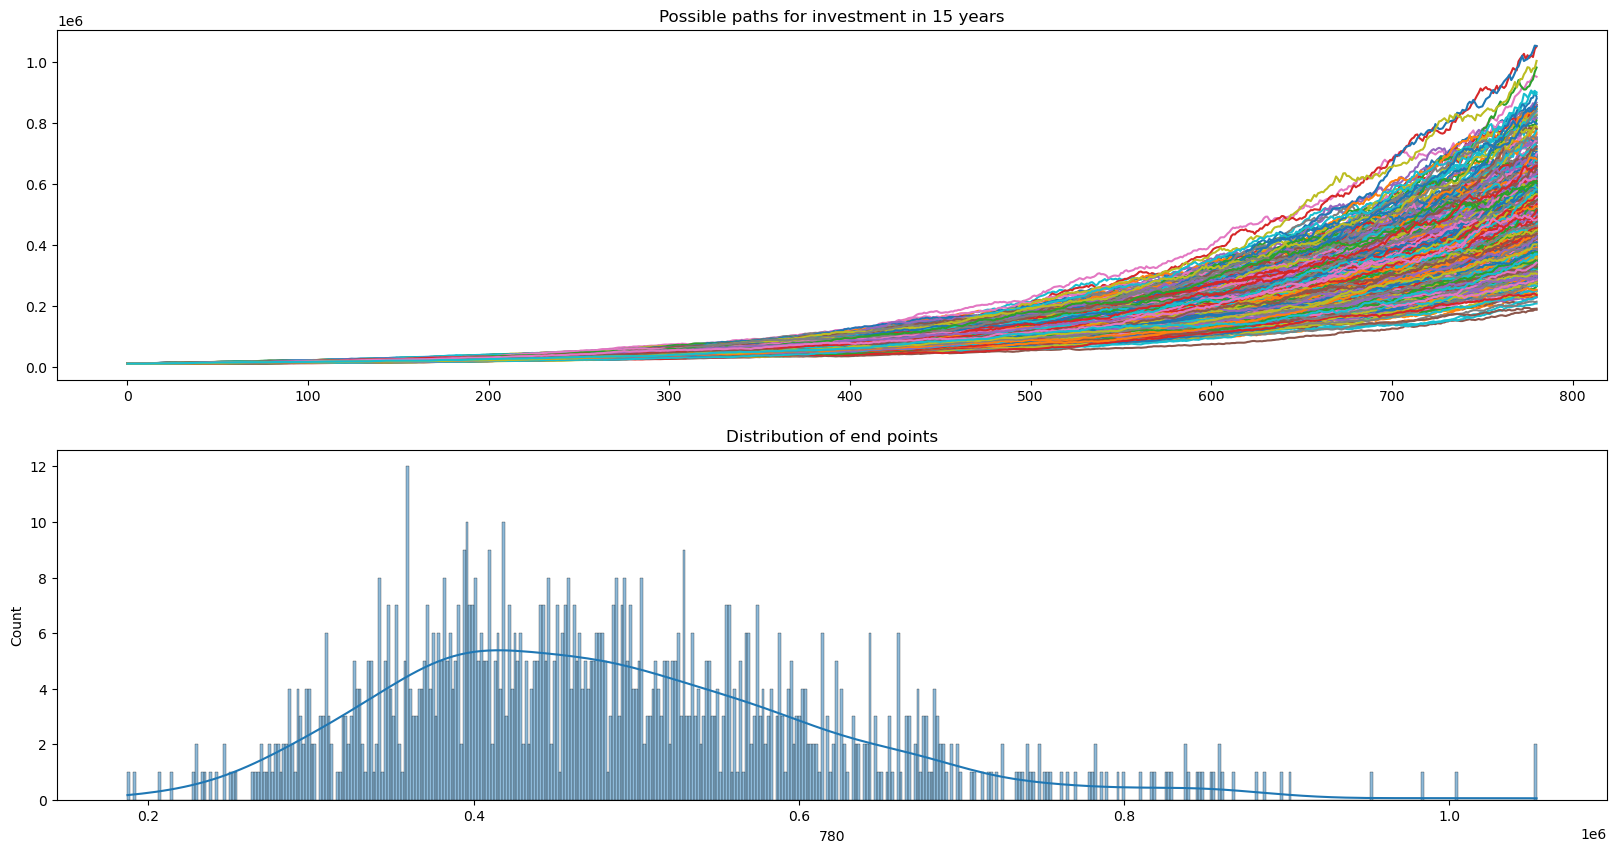

Median end point: 464710.0
Mean end point: 482348.801
Max end point: 1053613
Min end point: 187076
Spread end point: 134280.68058433282
Max value: 1055002
Min value: 9452
Daily % change: 0.498277019185326%
Daily % volatility: 0.9950538497433152%
Mean total growth(%): 4723.48801
Median yearly growth(%): 29.16561531998739
Mean yearly growth(%): 29.496616232269318


[{'median_end': 489207.5,
  'mean_end': 489108.954,
  'max_end': 502026,
  'min_end': 478800,
  'spread_end': 3427.006658663286,
  'max_value': 502026,
  'min_value': 10000,
  'daily_pct_chng': 0.49996373337385575,
  'daily_vol': 0.02556465927449078,
  'mean_tot_growth': 4791.08954,
  'median_yearly_growth': 29.60675805996039,
  'mean_yearly_growth': 29.606584774859506},
 {'median_end': 489000.0,
  'mean_end': 489527.457,
  'max_end': 540884,
  'min_end': 437170,
  'spread_end': 17856.627280031596,
  'max_value': 540884,
  'min_value': 10000,
  'daily_pct_chng': 0.5000689658018603,
  'daily_vol': 0.1273586939958809,
  'mean_tot_growth': 4795.2745700000005,
  'median_yearly_growth': 29.618797358074204,
  'mean_yearly_growth': 29.613650704136486},
 {'median_end': 489042.5,
  'mean_end': 489776.376,
  'max_end': 618635,
  'min_end': 404285,
  'spread_end': 31218.37128885093,
  'max_value': 618635,
  'min_value': 9960,
  'daily_pct_chng': 0.500140486141868,
  'daily_vol': 0.229632401880151

In [9]:
upper_ci_range = [0.01, 0.03, 0.05, 0.07, 0.1, 0.2]

stats_list = []
end_points_list = []
for i in upper_ci_range:
    df, stats = RenTechSym(sims = 1000, upper_ci = i)
    stats_list.append(stats)
    end_points_list.append(df.iloc[-1, :])
stats_list

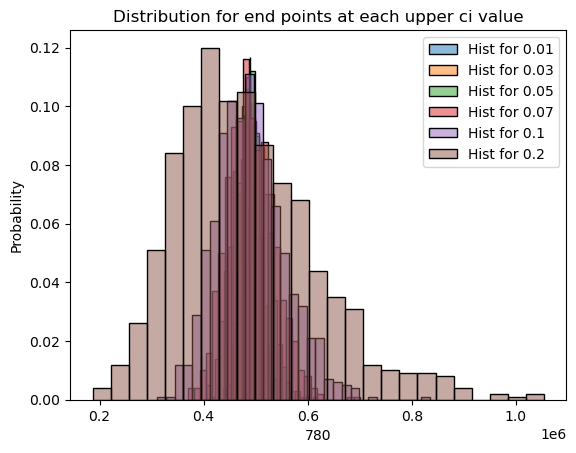

In [10]:
for end_points in range(len(end_points_list)):
    sns.histplot(end_points_list[end_points], label = f"Hist for {upper_ci_range[end_points]}", alpha = 0.5, stat = "probability")

plt.title("Distribution for end points at each upper ci value")
plt.legend()
plt.show()

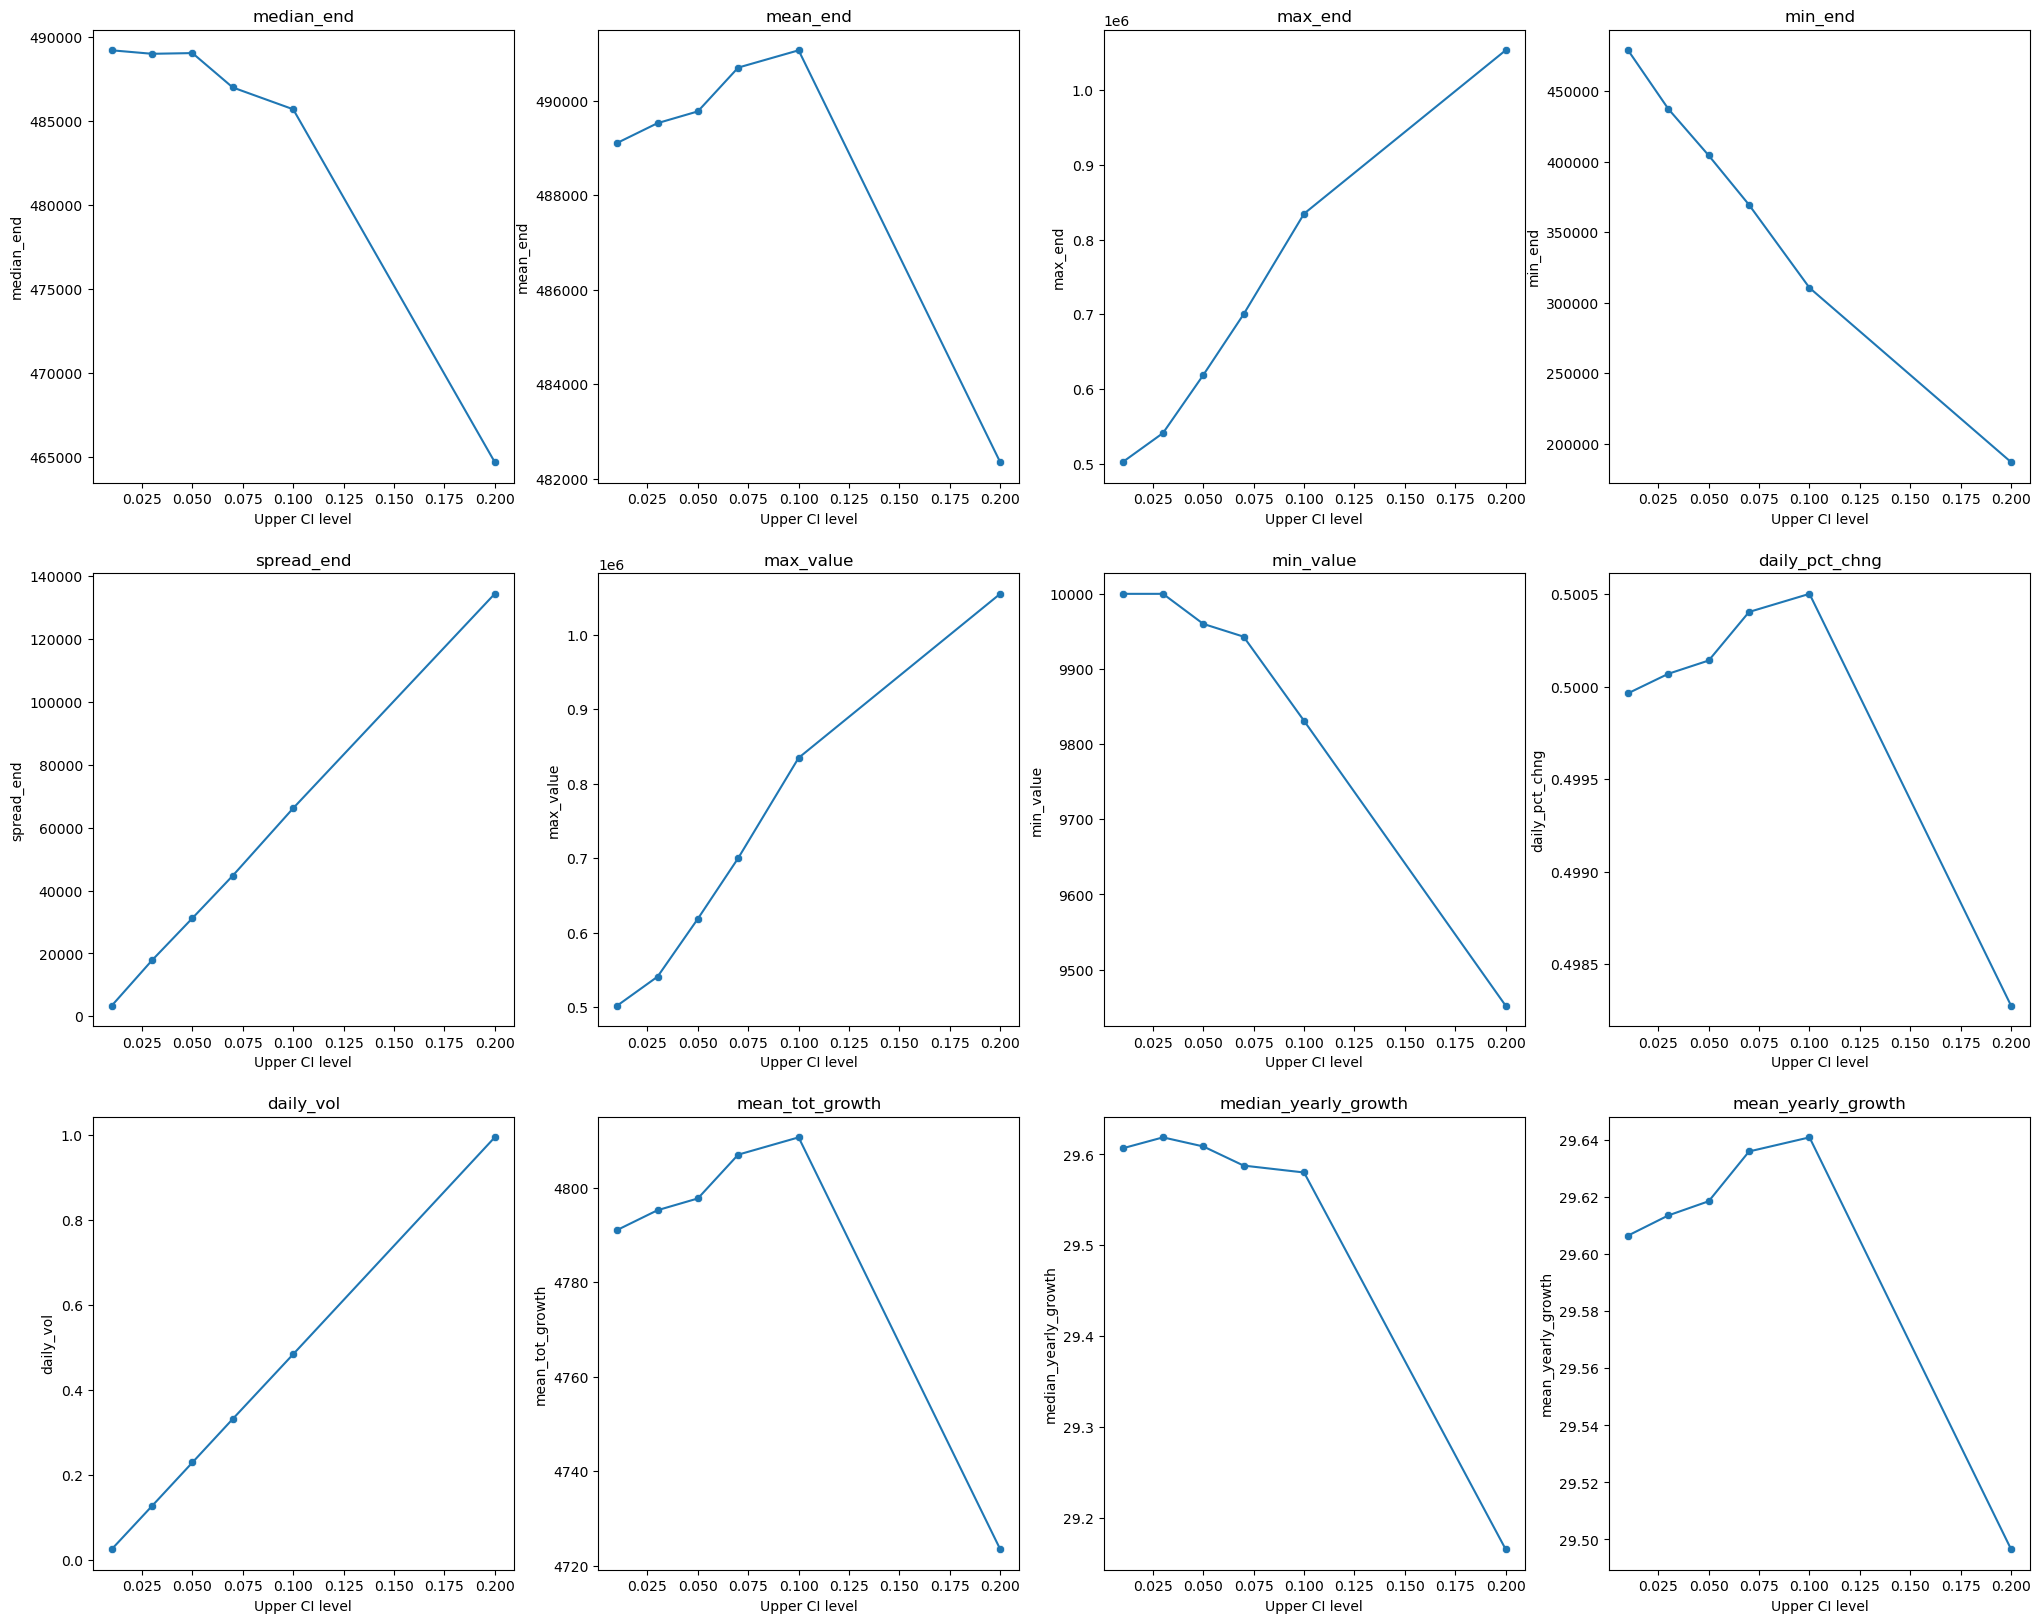

In [11]:
stats_df = pd.DataFrame(stats_list, index=[i for i in upper_ci_range])

fig, axes = plt.subplots(3, 4, figsize = (25, 20))

ax = axes.flatten()

for i in range(len(ax)):
    sns.lineplot(data = stats_df, x = stats_df.index, y = stats_df.iloc[:, i], ax = ax[i])
    ax[i].set_title(stats_df.columns[i])
    ax[i].set_xlabel("Upper CI level")
    sns.scatterplot(data = stats_df, x = stats_df.index, y = stats_df.iloc[:, i], ax = ax[i])

plt.show()  